In [77]:
print("hello world")

hello world


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df=pd.read_csv('insurance.csv')

In [80]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [82]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

Replacing the yes to 1 and no with 0

In [83]:
df['smoker'] = df['smoker'].str.lower().map({'yes': 1, 'no': 0})

In [84]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Replacing the region categorical data to numerical as - 10, 20, 30, 40

In [85]:
df['region'] = df['region'].map({'southwest': 10, 'southeast': 20, 'northwest': 30, 'northeast': 40,})

In [86]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

Replacing male - 1 and female - 0

In [87]:
df["sex"] = df["sex"].map({"male": 1, "female": 0})

Keeping only 2 decimal values for charges and bmi

In [88]:
df["charges"]=df["charges"].round(2)

In [89]:
df["bmi"]=df["bmi"].round(2)

In [90]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,10,16884.92
1,18,1,33.77,1,0,20,1725.55
2,28,1,33.00,3,0,20,4449.46
3,33,1,22.70,0,0,30,21984.47
4,32,1,28.88,0,0,30,3866.86


> Independent Variables (input) - age, sex, bmi, children, smoker, region     
> Dependent Variable / Column (output) - charges

# Checking Dataset is Linear or Not

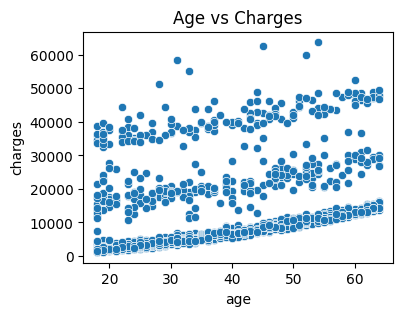

In [91]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')
plt.show()

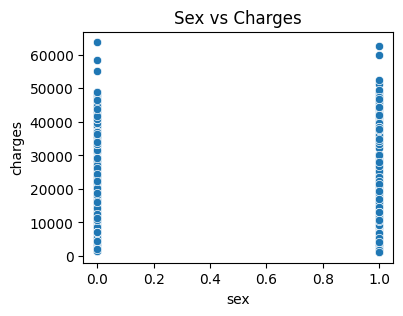

In [92]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='sex', y='charges', data=df)
plt.title('Sex vs Charges')
plt.show()

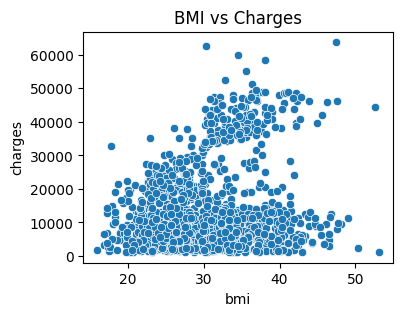

In [93]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')
plt.show()

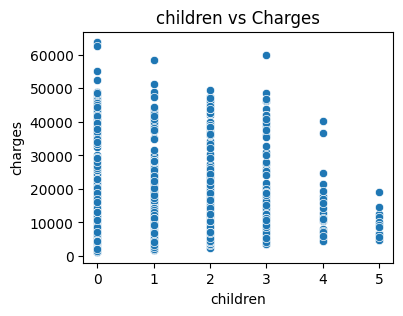

In [94]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='children', y='charges', data=df)
plt.title('children vs Charges')
plt.show()

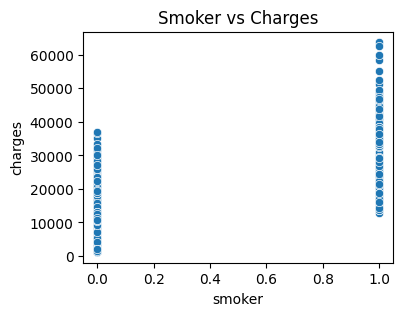

In [95]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')
plt.show()

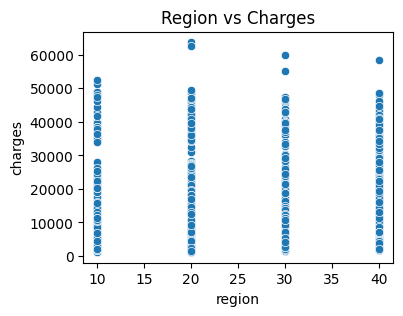

In [96]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='region', y='charges', data=df)
plt.title('Region vs Charges')
plt.show()

In [97]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109275,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046377,0.017163,0.076185,-0.004588,0.057292
bmi,0.109275,0.046377,1.000000,0.012766,0.003744,-0.157557,0.198331
children,0.042469,0.017163,0.012766,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003744,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157557,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198331,0.067998,0.787251,0.006208,1.000000


>age and charges has 0.29 = Very weak linear relation   
>sex and charges has 0.05 = no linear relation        
>bmi and charges has 0.19 = very weak relation       
>children and charges has 0.06 = no linear relation      
>smoker and charges has 0.78 = Strong linear relation   
>region and charges has 1.00 = Very Strong linear relation        

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Assigning the values

In [99]:
x = df.drop("charges", axis=1)
y = df["charges"]

training and testing

In [100]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=42)

In [101]:
model = LinearRegression()

Training the model

In [102]:
model.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [103]:
model.intercept_ # for base value when  x=0 the value is-13031.56

np.float64(-13031.560409035921)

In [104]:
model.coef_ # slope each column when 1 datapoint is adding these are the values increasing

array([ 2.57057524e+02, -1.87826604e+01,  3.35774571e+02,  4.25077673e+02,
        2.36478624e+04,  2.71241725e+01])

In [105]:
xtest.head()

,age,sex,bmi,children,smoker,region
764,45,0,25.18,2,0,40
887,36,0,30.02,0,0,30
890,64,0,26.88,0,1,30
1293,46,1,25.74,3,0,30
259,19,1,31.92,0,1,30


In [106]:
ytest.head()

764      9095.07
887      5272.18
890     29330.98
1293     9301.89
259     33750.29
Name: charges, dtype: float64

In [107]:
targeted_mean=ytest.mean()
targeted_mean

np.float64(12968.31723880597)

In [108]:
predicted_test=model.predict(xtest)

In [109]:
predicted_train=model.predict(xtrain)

Average Good Fit - coz 74% model predicted on trained data and 78% model predicted on test data

In [110]:
model.score(xtrain,ytrain)

0.7417018969732194

In [111]:
model.score(xtest,ytest)

0.7833482570097108

In [112]:
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error,mean_absolute_error

TRAIN

In [113]:
r2_score(ytrain,predicted_train) #74%

0.7417018969732194

In [114]:
mean_squared_error(ytrain,predicted_train)

37281100.77107105

TEST

In [115]:
r2_score(ytest,predicted_test) #78%

0.7833482570097108

In [116]:
mean_squared_error(ytest,predicted_test) #since the value is very high we cant compare with variance we go with mse_evaluation

33634908.81650731

In [117]:
root_mean_squared_error = np.sqrt(mean_squared_error(ytest,predicted_test))
root_mean_squared_error

np.float64(5799.56108826412)

In [118]:
MAE=mean_absolute_error(ytest,predicted_test)
MAE

4186.375335655003

There are outliers in dependent variable 

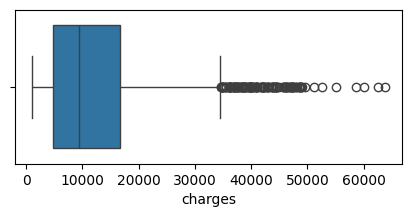

In [119]:
plt.figure(figsize=(5,2))
sns.boxplot(x=df["charges"])
plt.savefig("img1") # to save the image
plt.show()

In [120]:
MSE_evaluation = root_mean_squared_error / targeted_mean # this step is without outliers

In [121]:
MAE_evaluation = MAE / targeted_mean # outliers are present in dependent variable
MAE_evaluation

np.float64(0.32281561736690323)

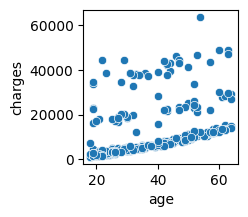

In [122]:
plt.figure(figsize=(2,2))
sns.scatterplot(x=xtest["age"],y=ytest)
plt.show()

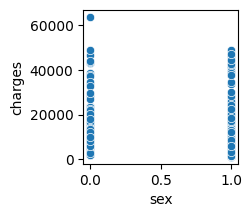

In [123]:
plt.figure(figsize=(2,2))
sns.scatterplot(x=xtest["sex"],y=ytest)
plt.show()

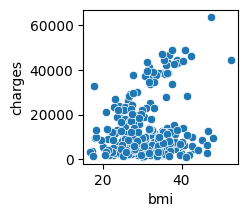

In [124]:
plt.figure(figsize=(2,2))
sns.scatterplot(x=xtest["bmi"],y=ytest)
plt.show()

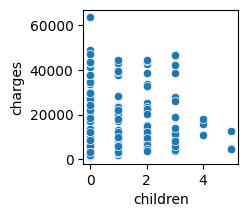

In [125]:
plt.figure(figsize=(2,2))
sns.scatterplot(x=xtest["children"],y=ytest)
plt.show()

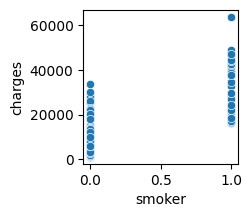

In [126]:
plt.figure(figsize=(2,2))
sns.scatterplot(x=xtest["smoker"],y=ytest)
plt.show()

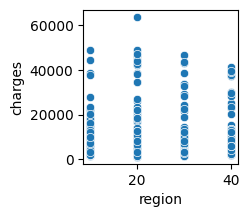

In [127]:
plt.figure(figsize=(2,2))
sns.scatterplot(x=xtest["region"],y=ytest)
plt.show()

Xtest v/s Predicted_ytest

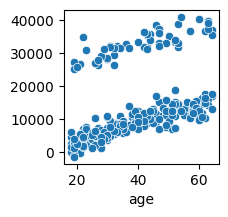

In [128]:
plt.figure(figsize=(2,2))
sns.scatterplot(x=xtest["age"],y=predicted_test)
plt.show()

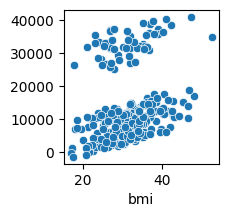

In [129]:
plt.figure(figsize=(2,2))
sns.scatterplot(x=xtest["bmi"],y=predicted_test)
plt.show()

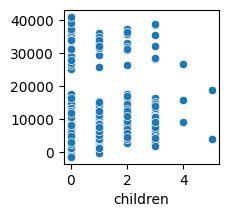

In [130]:
plt.figure(figsize=(2,2))
sns.scatterplot(x=xtest["children"],y=predicted_test)
plt.show()

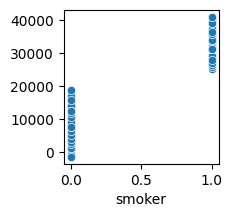

In [131]:
plt.figure(figsize=(2,2))
sns.scatterplot(x=xtest["smoker"],y=predicted_test)
plt.show()

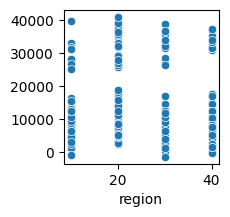

In [132]:
plt.figure(figsize=(2,2))
sns.scatterplot(x=xtest["region"],y=predicted_test)
plt.show()